In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv('Advertising.csv',usecols=[1,2,3,4])

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
pd.set_option('precision', 2)
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [8]:
(advertising == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

C:\Users\monts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


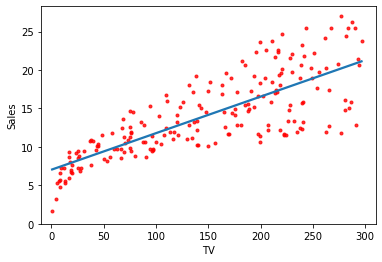

In [9]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show() 

C:\Users\monts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


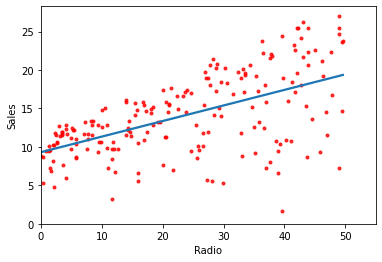

In [10]:
sns.regplot(advertising.Radio, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show()

C:\Users\monts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


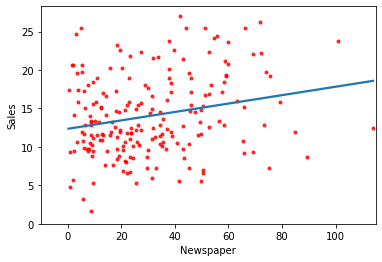

In [11]:
sns.regplot(advertising.Newspaper, advertising.Sales, order=1, ci=None,scatter_kws={'color':'r', 's':9})
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

In [12]:
from sklearn.preprocessing import scale
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

In [13]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [14]:
X.mean()

1.0089706847793422e-14

In [15]:
X.std()

85.63933175679269

In [16]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [17]:
regr.intercept_

14.0225

In [18]:
regr.coef_ 

array([0.04753664])

In [19]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [21]:
regr = skl_lm.LinearRegression()
X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales
regr.fit(X,y)


LinearRegression()

In [22]:
regr.intercept_


7.032593549127693

In [23]:
regr.coef_

array([0.04753664])

In [24]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [25]:
mse = min_rss/len(y)

In [26]:
mse

10.512652915656757

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

In [28]:
mean_squared_error(y, Sales_pred)

10.512652915656757

In [29]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        12:39:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
est.params

Intercept    7.03
TV           0.05
dtype: float64

In [31]:
((advertising.Sales - (est.params[0] + est.params[1] * advertising.TV))** 2).sum()

2102.5305831313517

In [32]:
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))** 2).sum()/len(advertising.Sales)

10.512652915656759

In [33]:
est = smf.ols('Sales ~ Radio', advertising).fit()est = smf.ols('Sales ~ Radio', advertising).fit()
print(est.summary().tables[1])

SyntaxError: invalid syntax (<ipython-input-33-3da9cd9e8c28>, line 1)

In [34]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [35]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        12:41:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""